In [25]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [9]:
quicklink = pd.read_csv(r'C:\Users\utanastiches\Downloads\quickbus.csv')
quicklink.head()

train = quicklink.copy()


In [10]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as eng_stop_words

stopwords = stopwords + """.,;:'"%”^&*()@#“$%^!~`<>|\?’/""".split() + list(eng_stop_words)




In [11]:
def remove_stopwords(quicklink):
    result = []
    for sentence in quicklink:
        sen = sentence.split()
        index = 0
        x = ''
        while index != len(sen):
            word = sen[index]
            if word.lower() not in stopwords:
                x += f' {word}'
            index += 1
            
        result.append(x)        
    return result 


sentence = remove_stopwords(quicklink)


In [12]:
# create a dictionary mapping the column name to it sentence

# col_name = sentence.split()
column = []
for word in sentence:
    save = ''
    sens = word.split()
    if len(sens) == 1:
        column.append(sens[0])
    else:
        for string in sens[:4]:
            save += string[0].upper()
    if save != '':
        column.append(save)  
        
        
meaning_col = {}
index = 0
for words in column:
    meaning_col[words] = sentence[index]
    index +=1

In [13]:
meaning_col

{'Timestamp': ' Timestamp',
 'EALF': ' email address link Facebook account?',
 '(Nickname)?': ' (Nickname)?',
 'commute?': ' commute?',
 'UPT': ' use public transit?',
 'ACD': ' average commuting distance?',
 'SNDL': ' state Nigeria do/did live in?',
 'CNDL': ' city Nigeria do/did live in?',
 'TTWM': ' time typically wake morning prepare work?',
 'SWTD': ' satisfied waking time day prepare work?',
 'WEEC': ' wake extra early catch bus cab work?',
 'WEEB': ' wake extra early beat traffic way work?',
 'MMC': ' major means commuting?',
 'RTWW': ' regular traffic way work?',
 'FESA': ' feel exhausted sleepy arrived workplace?',
 'FFRM': ' following factors, relating morning commute, affect mental physical state work?',
 'CDCW': ' cost daily commute work? car bike, etc; average spend petrol, servicing Naira.',
 'TIDC': ' think improve daily commute?',
 'TIPT': ' think improve public transport area?'}

In [14]:
train.columns = column

In [15]:
# train

,Timestamp,EALF,(Nickname)?,commute?,UPT,ACD,SNDL,CNDL,TTWM,SWTD,WEEC,WEEB,MMC,RTWW,FESA,FFRM,CDCW,TIDC,TIPT
0,2020/09/12 8:47:34 PM GMT,NaN,Godswill,Daily,Very often,Mild distance,Ondo State,Ikare Akoko,6AM,Neutral,No,No,Bike,No,Maybe,'Having change' to pay for the services (for e...,200,Owning a car,Construction of good roads.
1,2020/09/12 8:48:32 PM GMT,NaN,Dee,Daily,Very often,Mild distance,Ondo State,Ikare Akoko,6AM,Neutral,No,No,Bike,No,Maybe,'Having change' to pay for the services (for e...,200,Owning a car,Construction of good roads.
2,2020/09/13 4:35:47 AM GMT,NaN,Fortune Emmanuel-King,Daily,Very often,Long distance,FCT,Abuja,6AM,No,Yes,Yes,Bus (Mass transit),Yes,Yes,The hassle at the bus stop to get into a bus o...,0 ---500,No hold up,Better road flow
3,2020/09/13 5:22:12 AM GMT,NaN,Kim,Daily,Very often,Mild distance,Lagos,Lagos,8AM,Neutral,No,No,Taxi;Bus (Mass transit);Bike,No,No,The amount of traffic on the way,0 ---500,NaN,NaN
4,2020/09/13 5:24:32 AM GMT,NaN,Eddie,Daily,Very often,Long distance,Edo state,Benin,7AM,Yes,No,Neutal,Taxi;Bus (Mass transit),Periodic traffic,Depends on how late I stayed,The amount of traffic on the way;'Having chang...,500---1000,"A personal car lol. On a serious note, it some...","Safer roads, safer vehicles, saner drivers"
5,2020/09/13 6:27:19 AM GMT,NaN,CyRil,About 3 times weekly,Very often,Mild distance,FCT,Abuja,6AM,No,Neutral,Neutal,Taxi,Yes,Yes,'Having change' to pay for the services (for e...,500---1000,We need more experienced drivers,A more organised transport system
6,2020/09/13 7:25:21 AM GMT,NaN,Okeke Makuochukwu Christian,Daily,Very often,Mild distance,Anambra,Agulu,7AM,Yes,No,Yes,Bus (Mass transit);Bike,Periodic traffic,No,The hassle at the bus stop to get into a bus o...,0 ---500,Improving the quality of transit transportatio...,Construction of good roads and adequate mainte...
7,2020/09/13 7:33:43 AM GMT,NaN,"Jemima ""Why do you want to know?"" James",About 3 times weekly,A few times a week,Short distance,Enugu,Nsukka,7AM,Neutral,No,No,Bus (Mass transit),No,No,'Having change' to pay for the services (for e...,0 ---500,An app that shows availability of seats in pub...,I've not thought about it.
8,2020/09/13 7:33:51 AM GMT,NaN,Joseph,About 3 times weekly,Very often,Mild distance,Edo,Benin,6AM,No,Yes,Neutal,Bus (Mass transit),Periodic traffic,Yes,'Having change' to pay for the services (for e...,2000---5000,More roads to reduce traffic and maybe more tr...,Better roads\nGood roads reduce traffic and ma...
9,2020/09/13 8:23:32 AM GMT,NaN,Adaku Ugwu,Daily,Very often,Long distance,Edo,Benin City,7AM,No,Yes,No,Bus (Mass transit),Periodic traffic,Maybe,The amount of traffic on the way,500---1000,Leaving the house earlier,Busstops to drop and pick passengers unlike ...


In [33]:
train_clean =  train.drop(['Timestamp', 'EALF', '(Nickname)?'], axis=1)
print(train_clean.info())
meaning_col




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   commute?  32 non-null     object
 1   UPT       32 non-null     object
 2   ACD       32 non-null     object
 3   SNDL      31 non-null     object
 4   CNDL      31 non-null     object
 5   TTWM      32 non-null     object
 6   SWTD      32 non-null     object
 7   WEEC      32 non-null     object
 8   WEEB      32 non-null     object
 9   MMC       32 non-null     object
 10  RTWW      32 non-null     object
 11  FESA      32 non-null     object
 12  FFRM      32 non-null     object
 13  CDCW      32 non-null     object
 14  TIDC      22 non-null     object
 15  TIPT      25 non-null     object
dtypes: object(16)
memory usage: 4.1+ KB
None


{'Timestamp': ' Timestamp',
 'EALF': ' email address link Facebook account?',
 '(Nickname)?': ' (Nickname)?',
 'commute?': ' commute?',
 'UPT': ' use public transit?',
 'ACD': ' average commuting distance?',
 'SNDL': ' state Nigeria do/did live in?',
 'CNDL': ' city Nigeria do/did live in?',
 'TTWM': ' time typically wake morning prepare work?',
 'SWTD': ' satisfied waking time day prepare work?',
 'WEEC': ' wake extra early catch bus cab work?',
 'WEEB': ' wake extra early beat traffic way work?',
 'MMC': ' major means commuting?',
 'RTWW': ' regular traffic way work?',
 'FESA': ' feel exhausted sleepy arrived workplace?',
 'FFRM': ' following factors, relating morning commute, affect mental physical state work?',
 'CDCW': ' cost daily commute work? car bike, etc; average spend petrol, servicing Naira.',
 'TIDC': ' think improve daily commute?',
 'TIPT': ' think improve public transport area?'}

In [48]:
def BarPlotting(color, label, column):
    train_clean[column].value_counts().plot.bar(color=color)
    plt.title(label=label)
    return plt.show()

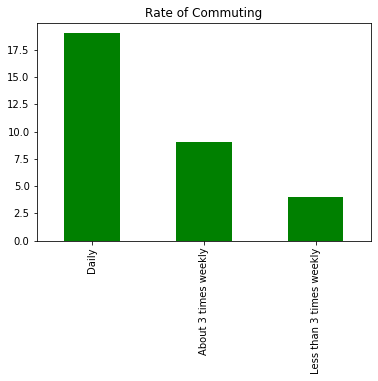

None


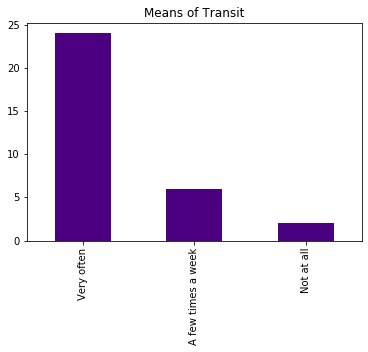

None


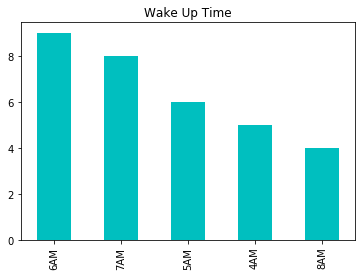

None


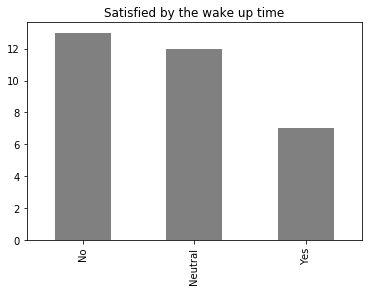

None


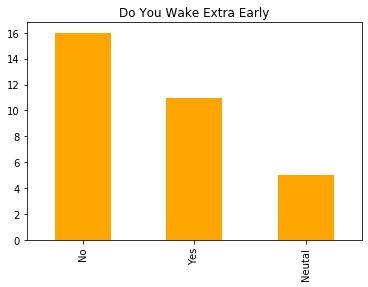

None


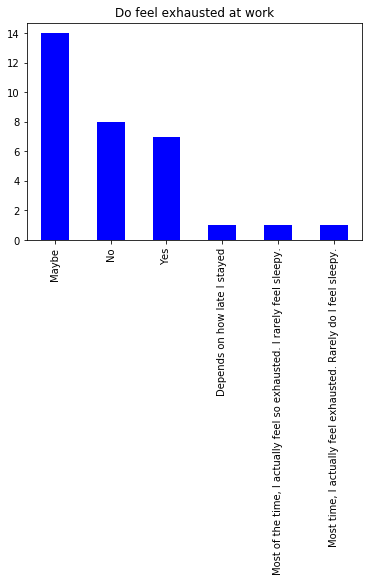

None


In [60]:
print(BarPlotting('green', 'Rate of Commuting', 'commute?'))
print(BarPlotting('indigo', 'Means of Transit', 'UPT'))
print(BarPlotting('c', 'Wake Up Time', 'TTWM'))
print(BarPlotting('grey', 'Satisfied by the wake up time', 'SWTD'))
print(BarPlotting('orange', 'Do You Wake Extra Early', 'WEEB'))
print(BarPlotting('blue', 'Do feel exhausted at work', 'FESA'))

In [65]:
# plt.stackplot(train_clean['commute?', train_clean['TTWM'].value_counts()])






Text(0.5, 1.0, 'Rate of Commuting')

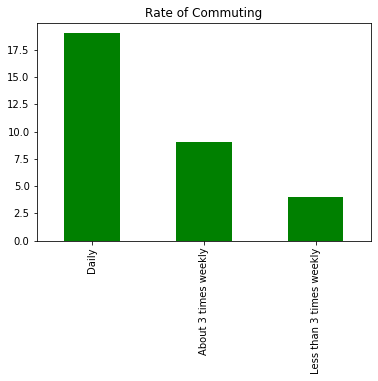

In [41]:

# understand what 

train_clean['commute?'].value_counts().plot.bar(color= 'green')
plt.title(label='Rate of Commuting')
# find the relationship between wake up time na rate of communting
# this give us a sense of how the distribution of of the commuting rate of of our transporters

# find the relationship between 
# train_clean['sn']




Text(0.5, 1.0, 'Rate of Public transport use')

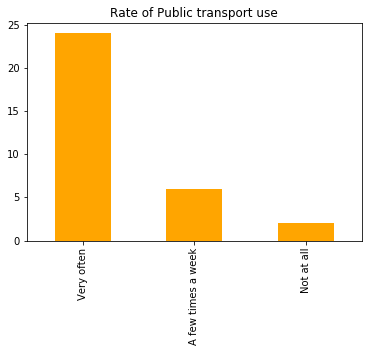

In [42]:
#check out the relationship between UPT and ACD
train_clean['UPT'].value_counts().plot.bar(color= 'orange')
plt.title(label='Rate of Public transport use')